In [49]:
import csv
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from pitch import pvq

df = pd.read_csv("archive/ted_main.csv")


In [4]:
temp = df[:21]["ratings"]
ratings = temp.to_numpy()
for id in range(len(ratings)):
    ratings[id] = json.loads(ratings[id].replace("'", "\""))



In [ ]:
labels = []

for i in range(len(ratings)):
    rating = ratings[i]
    labels.append({})
    for obj in rating:
        labels[i][obj["name"]] = obj["count"]



#print(labels[5], labels[5].values(), sum(labels[5].values()))
for i in range(len(labels)):
    labels[i]["sum"] = sum(labels[i].values())
    

print(labels)

In [42]:
scores = []
for label in labels:
    scores.append([label["Fascinating"], label["Fascinating"]/label["sum"]])

print(scores)

[[10581, 0.1127437400106553], [132, 0.04495912806539509], [166, 0.058781869688385266], [132, 0.03540772532188841], [4606, 0.17978142076502732], [1350, 0.08791351914561084], [316, 0.05268422807602534], [153, 0.1494140625], [313, 0.07932083122149011], [459, 0.05512189263840519], [148, 0.08314606741573034], [41, 0.06925675675675676], [83, 0.09367945823927765], [919, 0.11049657328363592], [67, 0.08578745198463508], [635, 0.10177913127103702], [454, 0.09702927976063261], [159, 0.08892617449664429], [220, 0.11393060590367685], [181, 0.11521323997453851], [111, 0.09430756159728122]]


In [35]:
file_nums = [2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 20]
pvqs = []

for num in file_nums:
    filename = "features/" + str(num) + ".csv"
    pvqs.append(pvq(filename))
    print(num, end=" ")


2 3 4 6 7 9 10 11 12 13 15 16 17 18 20 

Text(0.5, 1.0, "Pitch Variance Quotient & 'facinating' index")

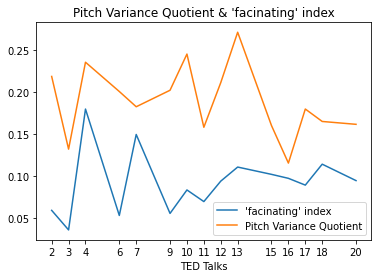

In [48]:
scores_temp = [scores[i][1] for i in file_nums]
plt.plot(file_nums, scores_temp, label="'facinating' index")
plt.plot(file_nums, pvqs, label="Pitch Variance Quotient")
plt.xticks(file_nums)
plt.legend()
plt.xlabel("TED Talks")
plt.title("Pitch Variance Quotient & 'facinating' index")


In [50]:
np.corrcoef(scores_temp, pvqs)

array([[1.        , 0.24668309],
       [0.24668309, 1.        ]])